In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df =pd.read_csv("CAR DETAILS.csv")
df.head()

name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner

In [4]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [5]:
df.shape

(4340, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [7]:
df.describe()

year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000

In [8]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [9]:
duplicate_df=df[df.duplicated()]
duplicate_df

name  year  selling_price  km_driven    fuel  \
13                      Maruti 800 AC  2007          60000      70000  Petrol   
14           Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
15               Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
16             Datsun RediGO T Option  2017         250000      46000  Petrol   
17              Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   
...                               ...   ...            ...        ...     ...   
4307                 Mahindra Xylo H4  2019         599000      15000  Diesel   
4308              Maruti Alto 800 LXI  2018         200000      35000  Petrol   
4309                 Datsun GO Plus T  2017         350000      10171  Petrol   
4310  Renault Duster 110PS Diesel RxL  2015         465000      41123  Diesel   
4311          Toyota Camry Hybrid 2.5  2017        1900000      20118  Petrol   

     seller_type transmission         owner  
13    Individual       Manual   First Owner  
14    Individual       Manual   First Owner  
15    Individual       Manual   First Owner  
16    Individual       Manual   First Owner  
17    Individual       Manual  Second Owner  
...          ...          ...           ...  
4307  Individual       Manual   Third Owner  
4308  Individual       Manual   First Owner  
4309      Dealer       Manual   First Owner  
4310      Dealer       Manual   First Owner  
4311      Dealer    Automatic   First Owner  

[763 rows x 8 columns]

In [10]:
data=df.drop_duplicates()
data.shape

(3577, 8)

In [11]:
data['selling_price'].nunique()


445

In [12]:
data=df

In [13]:
name = df['name'].str.split(' ', expand=True)
df['car_maker'] = name[0]
df['car_model'] = name[1]
print('Data After Splitting car Name')
print(df.head().to_string())

Data After Splitting car Name
                       name  year  selling_price  km_driven    fuel seller_type transmission         owner car_maker car_model
0             Maruti 800 AC  2007          60000      70000  Petrol  Individual       Manual   First Owner    Maruti       800
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol  Individual       Manual   First Owner    Maruti     Wagon
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel  Individual       Manual   First Owner   Hyundai     Verna
3    Datsun RediGO T Option  2017         250000      46000  Petrol  Individual       Manual   First Owner    Datsun    RediGO
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel  Individual       Manual  Second Owner     Honda     Amaze


### Exploratory Data Analysis
- we can find out the hidden patternand insight in dataFrame.

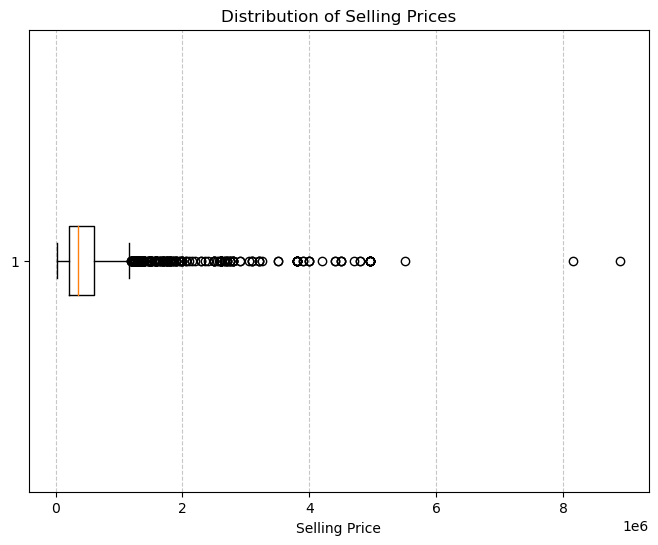

In [14]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['selling_price'], vert=False)

# Add title and labels
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


###  Box plot for finding outliers :
- we can clearly see in box plot two values deviate more.Replace the identified outlier values from the dataset .

In [15]:
df['selling_price'].max()

8900000

In [16]:
mean_selling_price=df['selling_price'].mean()
mean_selling_price

504127.3117511521

In [17]:
df['selling_price'] = np.where(df['selling_price'] > 6000000, mean_selling_price, df['selling_price'])
df['selling_price'].max()

5500000.0

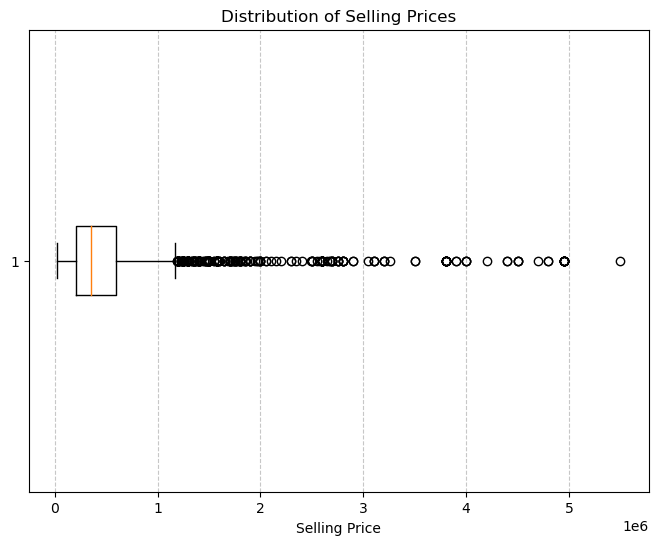

In [18]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['selling_price'], vert=False)

# Add title and labels
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


#### Now outliers are replaced with its mean selling price

In [19]:
fuel_counts = df['fuel'].value_counts()
fuel_counts

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

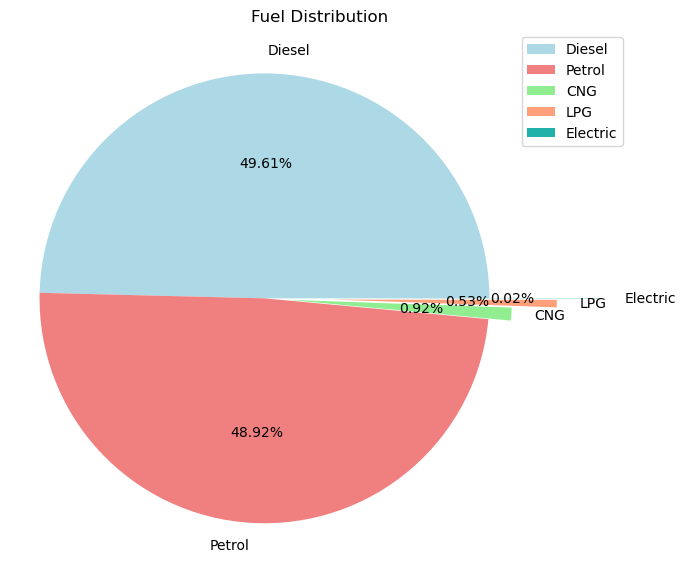

In [20]:
fuel_counts = df['fuel'].value_counts()

# Define colors for the pie chart
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen']

# Create a pie chart with custom colors and explode a slice for emphasis
plt.figure(figsize=(8, 7))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%.2f%%', colors=colors, explode=(0, 0, 0.1, 0.3, 0.5))
plt.title('Fuel Distribution')

# Add a legend
plt.legend(fuel_counts.index, loc='best')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

plt.show()


### Distribution of  fuel :-
- diesel and petrol is widely used fuel it is clearly seen in above pie chart.so we can make assumption and take a decision. 
- diesel car is most uses car .
- heavy vehicals generaly used diesel so consumption of diesel fuel is high.
- Electric vehicals are very less used vehicals we can clearly see in this pie chart.

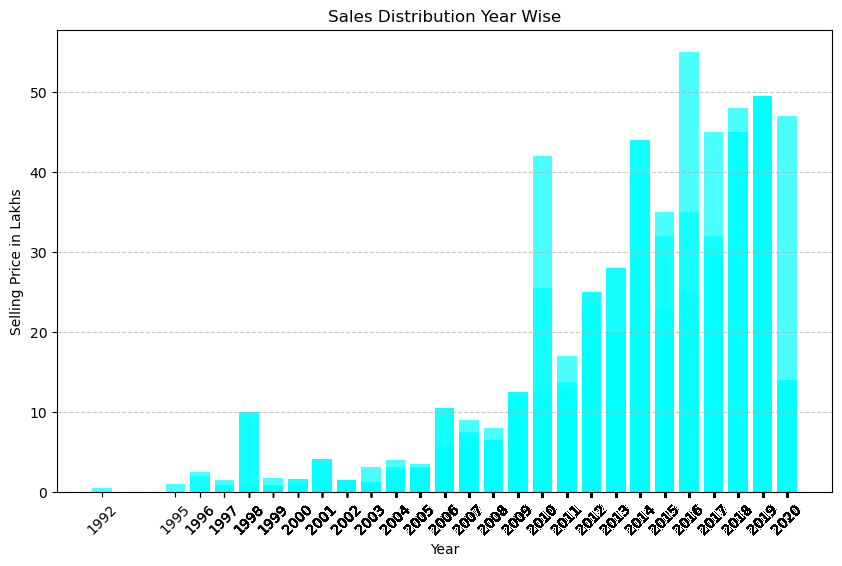

In [21]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create the bar chart
plt.bar(df['year'], df['selling_price'] / 100000, color='cyan', alpha=0.7)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Selling Price in Lakhs')
plt.title('Sales Distribution Year Wise')

# Customize the x-axis ticks
plt.xticks(df['year'], rotation=45)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


### Selling price year wise 
- selling price is increasing smoothly except 2010.In 2016 selling price was very high.

In [22]:
df['car_maker'].value_counts()

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: car_maker, dtype: int64

In [23]:
df.head()

name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007        60000.0      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007       135000.0      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012       600000.0     100000  Diesel   
3    Datsun RediGO T Option  2017       250000.0      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014       450000.0     141000  Diesel   

  seller_type transmission         owner car_maker car_model  
0  Individual       Manual   First Owner    Maruti       800  
1  Individual       Manual   First Owner    Maruti     Wagon  
2  Individual       Manual   First Owner   Hyundai     Verna  
3  Individual       Manual   First Owner    Datsun    RediGO  
4  Individual       Manual  Second Owner     Honda     Amaze

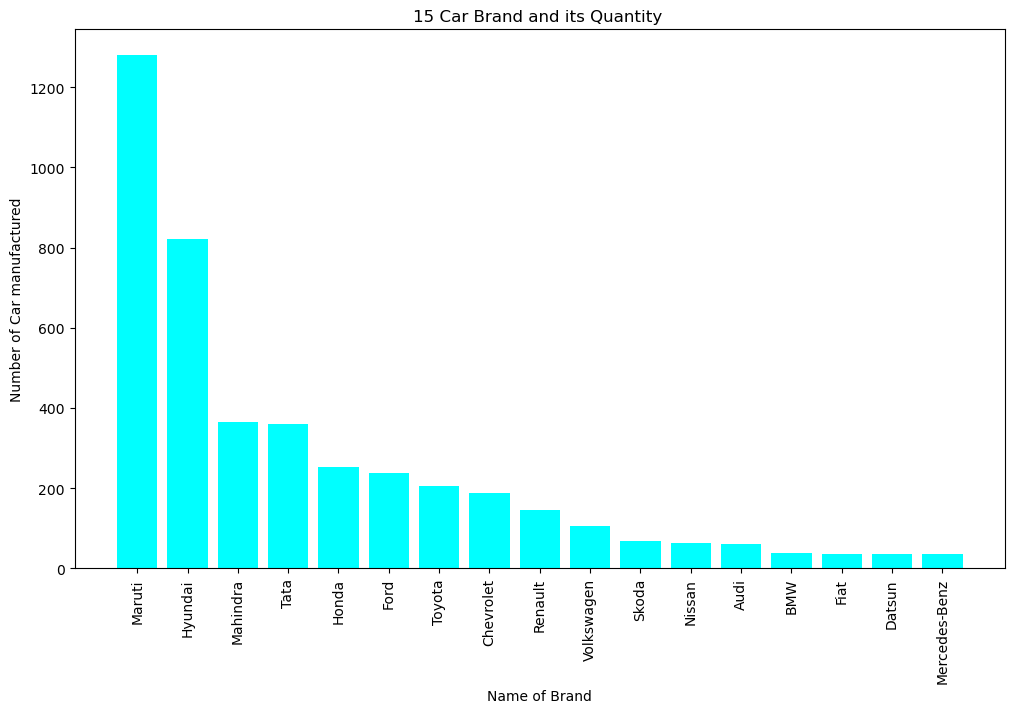

In [24]:
counts = df['car_maker'].value_counts()
filtered_counts = counts[counts > 15]
#set figure size
plt.figure(figsize=(12, 7))
filtered_counts_sort=filtered_counts.sort_values(ascending=False)
plt.bar(filtered_counts_sort .index,filtered_counts_sort,color='cyan' )
plt.xlabel('Name of Brand')
plt.ylabel('Number of Car manufactured')
plt.title('15 Car Brand and its Quantity ')
plt.xticks(rotation=90)
plt.show()

#### Highest manufacturer of car is Maruri and followed by Hyundai ,Mahindra ,Tata ,Honda,Ford,Toyota etc.
- BMW ,Audi, Mercedes these are the less used car due to the high price we can make a decesion on this basis .

In [25]:
# Sort the DataFrame by 'selling_price' in descending order and take the top 10 rows
top_20_selling_prices = df.sort_values(by='selling_price', ascending=False).head(20)
top_20_selling_prices



name  year  selling_price  \
3969         Mercedes-Benz GLS 2016-2020 350d 4MATIC  2016      5500000.0   
612                          BMW X5 xDrive 30d xLine  2019      4950000.0   
593                          BMW X5 xDrive 30d xLine  2019      4950000.0   
919                          BMW X5 xDrive 30d xLine  2019      4950000.0   
2239                         BMW X5 xDrive 30d xLine  2019      4950000.0   
900                          BMW X5 xDrive 30d xLine  2019      4950000.0   
574                          BMW X5 xDrive 30d xLine  2019      4950000.0   
1836                         BMW X5 xDrive 30d xLine  2019      4950000.0   
1023                         BMW X5 xDrive 30d xLine  2019      4950000.0   
2739                         BMW X5 xDrive 30d xLine  2019      4950000.0   
555                          BMW X5 xDrive 30d xLine  2019      4950000.0   
2258                         BMW X5 xDrive 30d xLine  2019      4950000.0   
3883                   BMW 5 Series 520d Luxury Line  2019      4800000.0   
3453                   BMW 5 Series 520d Luxury Line  2018      4800000.0   
963                                Audi A5 Sportback  2020      4700000.0   
4047                 Volvo XC 90 D5 Inscription BSIV  2017      4500000.0   
2580      Mercedes-Benz E-Class Exclusive E 200 BSIV  2018      4500000.0   
101       Mercedes-Benz E-Class Exclusive E 200 BSIV  2018      4500000.0   
539   Mercedes-Benz GL-Class 350 CDI Blue Efficiency  2014      4400000.0   
2178  Mercedes-Benz GL-Class 350 CDI Blue Efficiency  2014      4400000.0   

      km_driven    fuel seller_type transmission         owner      car_maker  \
3969      77350  Diesel      Dealer    Automatic   First Owner  Mercedes-Benz   
612       30000  Diesel      Dealer    Automatic   First Owner            BMW   
593       30000  Diesel      Dealer    Automatic   First Owner            BMW   
919       30000  Diesel      Dealer    Automatic   First Owner            BMW   
2239      30000  Diesel      Dealer    Automatic   First Owner            BMW   
900       30000  Diesel      Dealer    Automatic   First Owner            BMW   
574       30000  Diesel      Dealer    Automatic   First Owner            BMW   
1836      30000  Diesel      Dealer    Automatic   First Owner            BMW   
1023      30000  Diesel      Dealer    Automatic   First Owner            BMW   
2739      30000  Diesel      Dealer    Automatic   First Owner            BMW   
555       30000  Diesel      Dealer    Automatic   First Owner            BMW   
2258      30000  Diesel      Dealer    Automatic   First Owner            BMW   
3883      12999  Diesel      Dealer    Automatic   First Owner            BMW   
3453       9422  Diesel  Individual    Automatic   First Owner            BMW   
963        1500  Diesel  Individual    Automatic   First Owner           Audi   
4047      80000  Diesel  Individual    Automatic   First Owner          Volvo   
2580       9800  Petrol      Dealer    Automatic   First Owner  Mercedes-Benz   
101        9800  Petrol      Dealer    Automatic   First Owner  Mercedes-Benz   
539      100000  Diesel  Individual    Automatic  Second Owner  Mercedes-Benz   
2178     100000  Diesel  Individual    Automatic  Second Owner  Mercedes-Benz   

     car_model  
3969       GLS  
612         X5  
593         X5  
919         X5  
2239        X5  
900         X5  
574         X5  
1836        X5  
1023        X5  
2739        X5  
555         X5  
2258        X5  
3883         5  
3453         5  
963         A5  
4047        XC  
2580   E-Class  
101    E-Class  
539   GL-Class  
2178  GL-Class

In [26]:
df['transmission'].value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

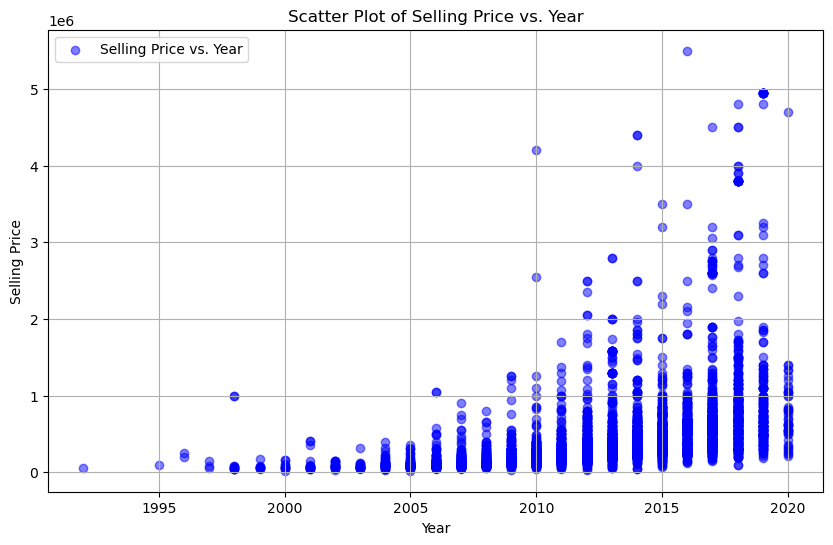

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['selling_price'], alpha=0.5, c='blue', label='Selling Price vs. Year')

# Set labels for the x and y axes
plt.xlabel('Year')
plt.ylabel('Selling Price')

# Set a title for the scatter plot
plt.title('Scatter Plot of Selling Price vs. Year')

# Display a legend
plt.legend(loc='best')

# Show the scatter plot
plt.grid(True)
plt.show()

In [33]:
Clean_cars_df=df

In [34]:

Clean_cars_df.to_csv('clean_cars_dataset.csv', index=False)
